In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data=pd.read_csv('processed_data - Copy.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13704\4175128423.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('processed_data - Copy.csv')


In [3]:
data.head()

,url,type,protocol,domain,path,num_query_params,has_login,has_ip,0,1,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,https://www.google.com,0,https,www.google.com,NaN,0,0,0,1.474012,-6.320653,...,-6.029618,-4.150418,-5.598467,4.607432,-0.874820,-14.032089,4.010758,-4.673757,4.027453,-5.597641
1,https://www.youtube.com,0,https,www.youtube.com,NaN,0,0,0,3.299294,-11.309541,...,-8.413183,-3.901798,-3.209155,11.499436,-2.999211,-0.598210,3.836595,-2.416809,1.971755,-3.914446
2,https://www.facebook.com,0,https,www.facebook.com,NaN,0,0,0,3.483486,-8.270725,...,-5.282053,-0.725000,-3.639594,2.920578,6.914502,-5.331585,2.558702,0.606924,0.340747,-6.124741
3,https://www.baidu.com,0,https,www.baidu.com,NaN,0,0,0,7.238088,-5.367383,...,-3.861706,3.446619,-2.998143,-1.311543,1.134740,-15.733363,6.407080,-1.327570,4.824454,-0.211129
4,https://www.wikipedia.org,0,https,www.wikipedia.org,NaN,0,0,0,2.583710,-7.949343,...,-9.124401,-3.307597,2.294101,10.153708,-2.189356,3.135201,-1.577050,-3.270767,-4.444252,-5.787119


In [4]:
data.describe()

,type,num_query_params,has_login,has_ip,0,1,2,3,4,5,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.30000,0.22850,0.040600,0.120300,1.825186,-0.489932,-1.280960,0.556674,1.521131,3.135187,...,-0.903838,-3.572469,-2.036305,7.213285,1.105316,11.355969,2.874509,-1.163744,1.057329,-4.150832
std,0.45828,0.76847,0.197372,0.325328,3.456439,4.897243,3.630948,3.545810,3.698558,5.784770,...,4.806444,3.365498,3.178033,5.411459,3.487084,15.617561,3.942291,4.134996,3.916178,4.282678
min,0.00000,0.00000,0.000000,0.000000,-12.120238,-21.683294,-13.997510,-15.264291,-11.278417,-15.123241,...,-14.191189,-17.681902,-14.782722,-21.994402,-11.381241,-62.399025,-13.943594,-18.038832,-13.521749,-19.249952
25%,0.00000,0.00000,0.000000,0.000000,-0.394850,-3.685385,-3.816044,-1.741664,-1.124774,-1.260022,...,-4.755268,-5.773082,-4.051370,3.528340,-1.284518,1.864583,0.334136,-3.879204,-1.613645,-7.101959
50%,0.00000,0.00000,0.000000,0.000000,2.061986,0.290551,-1.110662,0.698397,1.308093,2.478421,...,-1.010392,-3.611810,-1.835650,7.008583,1.112881,15.143221,2.555516,-1.295399,1.187455,-4.542320
75%,1.00000,0.00000,0.000000,0.000000,4.330365,3.103162,1.300020,2.994816,3.919147,7.619324,...,2.815659,-1.398567,0.179332,10.655400,3.544053,22.409606,5.143624,1.592963,3.811916,-1.336412
max,1.00000,11.00000,1.000000,1.000000,16.997646,19.047419,11.596862,17.359842,14.331092,21.191759,...,14.341599,9.492559,10.232706,33.205189,15.624345,55.056305,22.407187,15.094932,16.089056,13.132465


In [5]:
data.info

<bound method DataFrame.info of                                                     url  type protocol  \
0                                https://www.google.com     0    https   
1                               https://www.youtube.com     0    https   
2                              https://www.facebook.com     0    https   
3                                 https://www.baidu.com     0    https   
4                             https://www.wikipedia.org     0    https   
...                                                 ...   ...      ...   
9995               http://woodmax.in/.usaaupdate/login/     1     http   
9996  http://allegro.website/show_item.php=813864719...     1     http   
9997  http://domminationsducroixlignes.com/repartiti...     1     http   
9998               http://www.bumet.net/data/data/data/     1     http   
9999  http://integratedhost.com/update/gmail/login.p...     1     http   

                             domain                                   path  \
0

In [6]:
# Extract target labels
y = data['type'].values.astype('float32')  # Ensure correct data type


In [7]:
# Drop non-numeric columns and keep vectorized features
X = data.drop(columns=['url', 'type', 'domain', 'path'])

In [8]:
# Convert categorical feature 'protocol' into numerical values
X['protocol'] = LabelEncoder().fit_transform(X['protocol'])

In [9]:
# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Reshape data for RNN (assuming each row represents a time step)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # (samples, time_steps, features)


In [11]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)


In [12]:

# Define the RNN model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_scaled.shape[1])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (phishing or legitimate)
])

C:\Users\Admin\AppData\Roaming\JetBrains\DataSpell2024.3\projects\workspace\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9564 - loss: 0.1909 - val_accuracy: 0.9900 - val_loss: 0.0285
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9909 - loss: 0.0327 - val_accuracy: 0.9893 - val_loss: 0.0350
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9903 - loss: 0.0293 - val_accuracy: 0.9943 - val_loss: 0.0238
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9959 - loss: 0.0193 - val_accuracy: 0.9870 - val_loss: 0.0420
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9894 - loss: 0.0365 - val_accuracy: 0.9900 - val_loss: 0.0316
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9962 - loss: 0.0149 - val_accuracy: 0.9917 - val_loss: 0.0311
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9928 - loss: 0.0263 - val_accuracy: 0.9923 - val_loss: 0.0330
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accu

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2119
         1.0       0.98      0.98      0.98       881

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



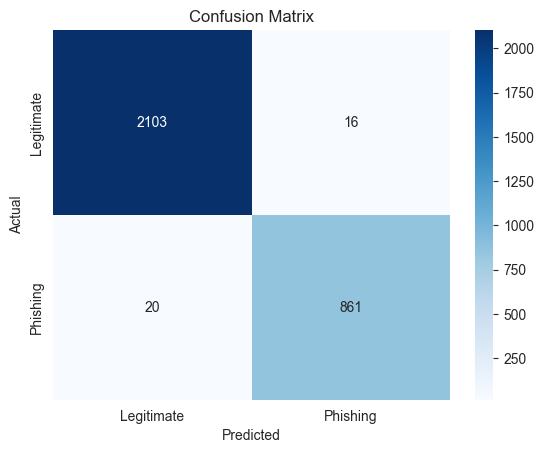

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [17]:
model.save('phishing_v1.h5')